In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl

import raddetect as rd

In [2]:
from scipy.stats import crystalball
from scipy.stats import norm

In [3]:
# It works only in the MPIK network
monalpha = rd.MonalphaAnalysis(file_path='Mn27052024')

Retrieving data from https://radon-srv1.mpi-hd.mpg.de/coating_db/resultfiles/Mn27052024/mn27052024.root


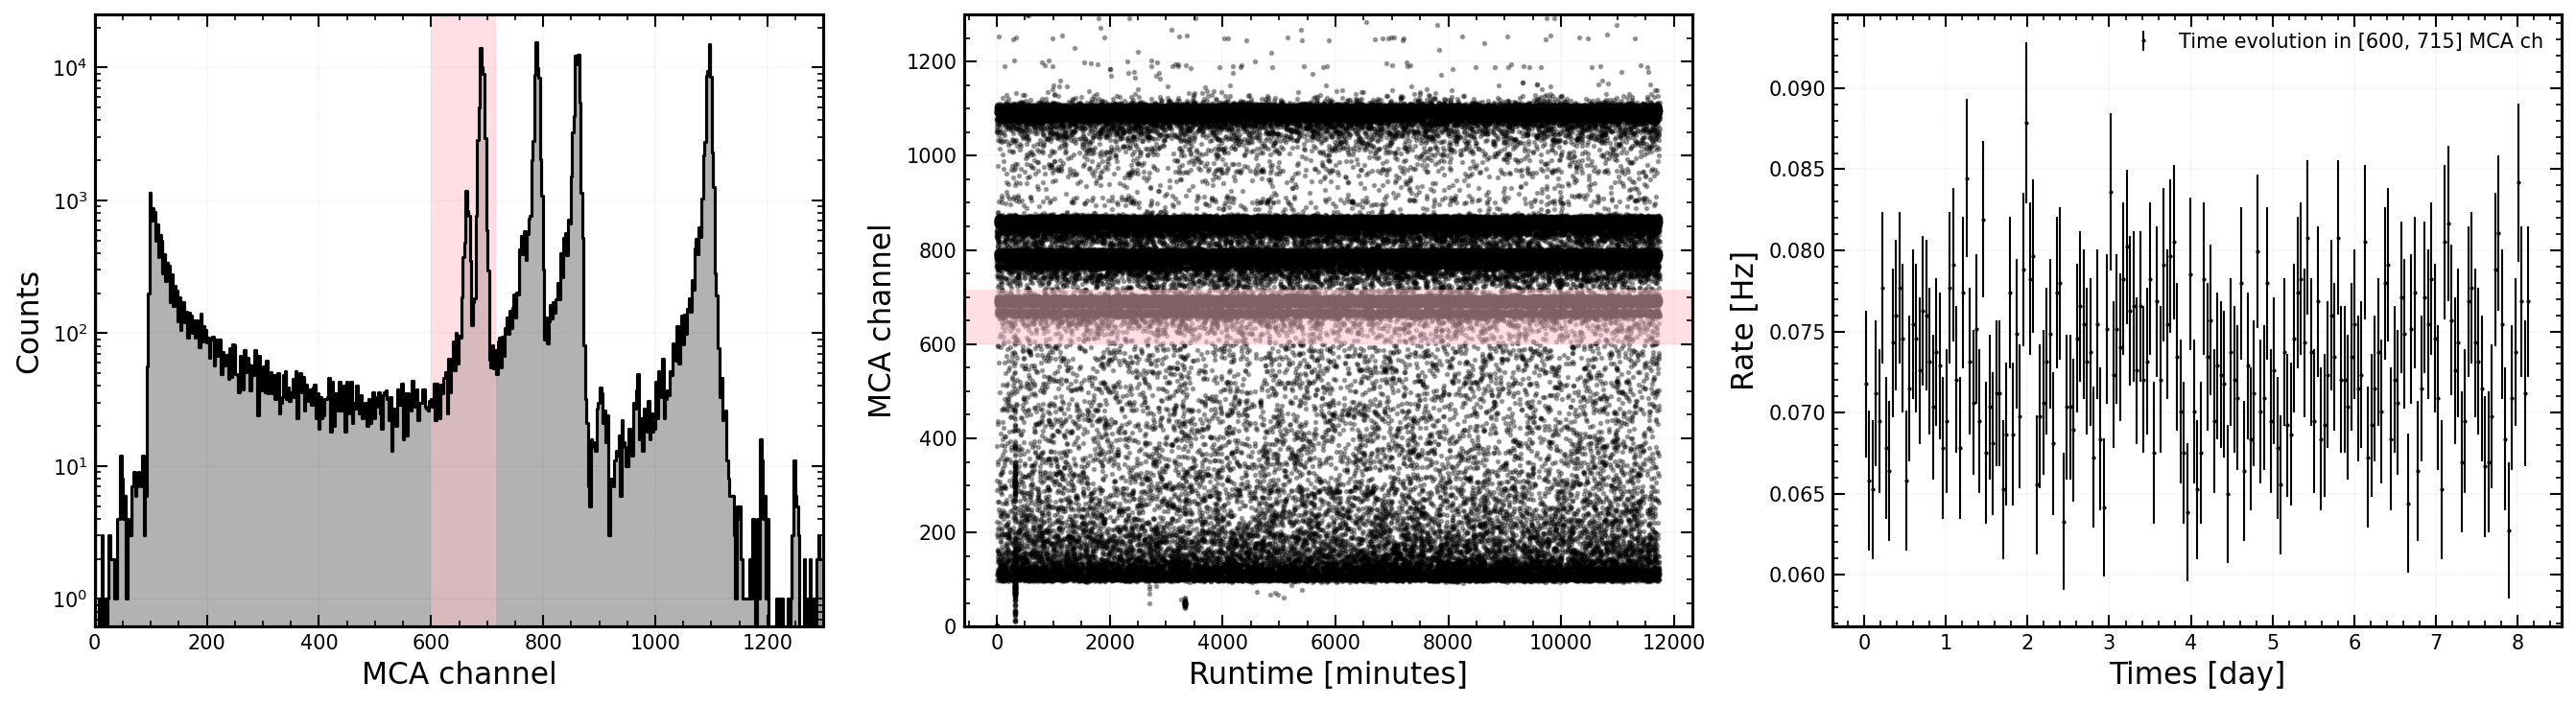

In [4]:
monalpha.get_base_plot(n_channels=500, n_timestamp=200)

In [31]:
class Model:
    def __init__(self, 
                x,
                # beta1, m1,
                loc1, scale1, A1, 
                beta2, m2, loc2, scale2, A2
                ):
        self.x = x
        #self.beta1 = beta1
        #self.m1 = m1
        self.loc1 = loc1
        self.scale1 = scale1
        self.A1 = A1
        self.beta2 = beta2
        self.m2 = m2
        self.loc2 = loc2
        self.scale2 = scale2
        self.A2 = A2
        self.compute_terms()

    def compute_terms(self):
        self.norm_1 = self.A1 * norm.pdf(self.x, loc=self.loc1, scale=self.scale1)
        # self.crystalball_1 = self.A1 * crystalball.pdf(self.x, self.beta1, self.m1, loc=self.loc1, scale=self.scale1)
        self.crystalball_2 = self.A2 * crystalball.pdf(self.x, self.beta2, self.m2, loc=self.loc2, scale=self.scale2) 

    def sum_terms(self):
        return self.norm_1 + self.crystalball_2

    @staticmethod
    def total_model(x, 
                    # beta1, m1, 
                    loc1, scale1, A1, 
                    beta2, m2, loc2, scale2, A2
                    ):
        model_instance = Model(x, 
                            # beta1, m1, 
                            loc1, scale1, A1, 
                            beta2, m2, loc2, scale2, A2
                            )
        return model_instance.sum_terms()

init = {
    # 'beta1': 1, 'm1': 2, 
    'loc1': 665, 'scale1': 3, 'A1': 100,
    'beta2': 1, 'm2': 2, 'loc2': 690, 'scale2': 3, 'A2': 3500
}

fixed = {
    # 'beta1': False, 'm1': False, 
    'loc1': False, 'scale1': False, 'A1': False, 
    'beta2': False, 'm2': False, 'loc2': False, 'scale2': False, 'A2': False,    
}

_MCA_range = [655, 710]
_MCA_counts_limit = 1
m = monalpha.get_mca_spectrum_fitting_object(model=Model, init=init, MCA_range=_MCA_range, MCA_counts_limit=_MCA_counts_limit, fixed=fixed)
m.migrad()
# m.minos()
# m.hesse()

Prefit with scipy for deriving inital values
| Parameters | Value       | Error       |
------------------------------------------
| loc1       |     664.855 |       0.078 |
| scale1     |       4.235 |       0.078 |
| A1         |    4212.202 |      76.898 |
| beta2      |       1.803 |       0.067 |
| m2         |       5.338 |       1.380 |
| loc2       |     691.757 |       0.019 |
| scale2     |       3.594 |       0.016 |
| A2         |   46475.643 |     221.844 |
------------------------------------------


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 516.4 (χ²/ndof = 11.2)     │              Nfcn = 129              │
│ EDM = 2.32e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ loc1   │  664.86   │   0.08    │            │            │         │         │       │
│ 1 │ scale1 │   4.24    │   0.09    │            │            │         │         │       │
│ 2 │ A1     │  4.21e3   │  0.08e3   │            │            │         │         │       │
│ 3 │ beta2  │   1.80    │   0.06    │            │            │         │         │       │
│ 4 │ m2     │    5.3    │    1.3    │            │            │         │         │       │
│ 5 │ loc2   │  691.757  │   0.018   │            │            │         │         │       │
│ 6 │ scale2 │   3.594   │   0.017   │            │            │         │         │       │
│ 7 │ A2     │  46.48e3  │  0.22e3   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────┐
│        │      loc1    scale1        A1     beta2        m2      loc2    scale2        A2 │
├────────┼─────────────────────────────────────────────────────────────────────────────────┤
│   loc1 │   0.00599     0.001     0.948    -0.001     0.031   0.04e-3  -0.03e-3    -1.218 │
│ scale1 │     0.001   0.00732     2.432    -0.002     0.056   0.07e-3  -0.06e-3    -2.254 │
│     A1 │     0.948     2.432  5.97e+03    -1.746      47.5  67.74e-3 -66.29e-3      -2e3 │
│  beta2 │    -0.001    -0.002    -1.746   0.00391    -0.076  -0.30e-3   0.37e-3     1.995 │
│     m2 │     0.031     0.056      47.5    -0.076      1.78   4.02e-3  -4.06e-3     -53.0 │
│   loc2 │   0.04e-3   0.07e-3  67.74e-3  -0.30e-3   4.02e-3   0.00034  -0.04e-3 -82.49e-3 │
│ scale2 │  -0.03e-3  -0.06e-3 -66.29e-3   0.37e-3  -4.06e-3  -0.04e-3  0.000301  81.23e-3 │
│     A2 │    -1.218    -2.254      -2e3     1.995     -53.0 -82.49e-3  81.23e-3  4.92e+04 │
└────────┴─────────────────────────────────────────────────────────────────────────────────┘

/tmp/ipykernel_13282/2963621798.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


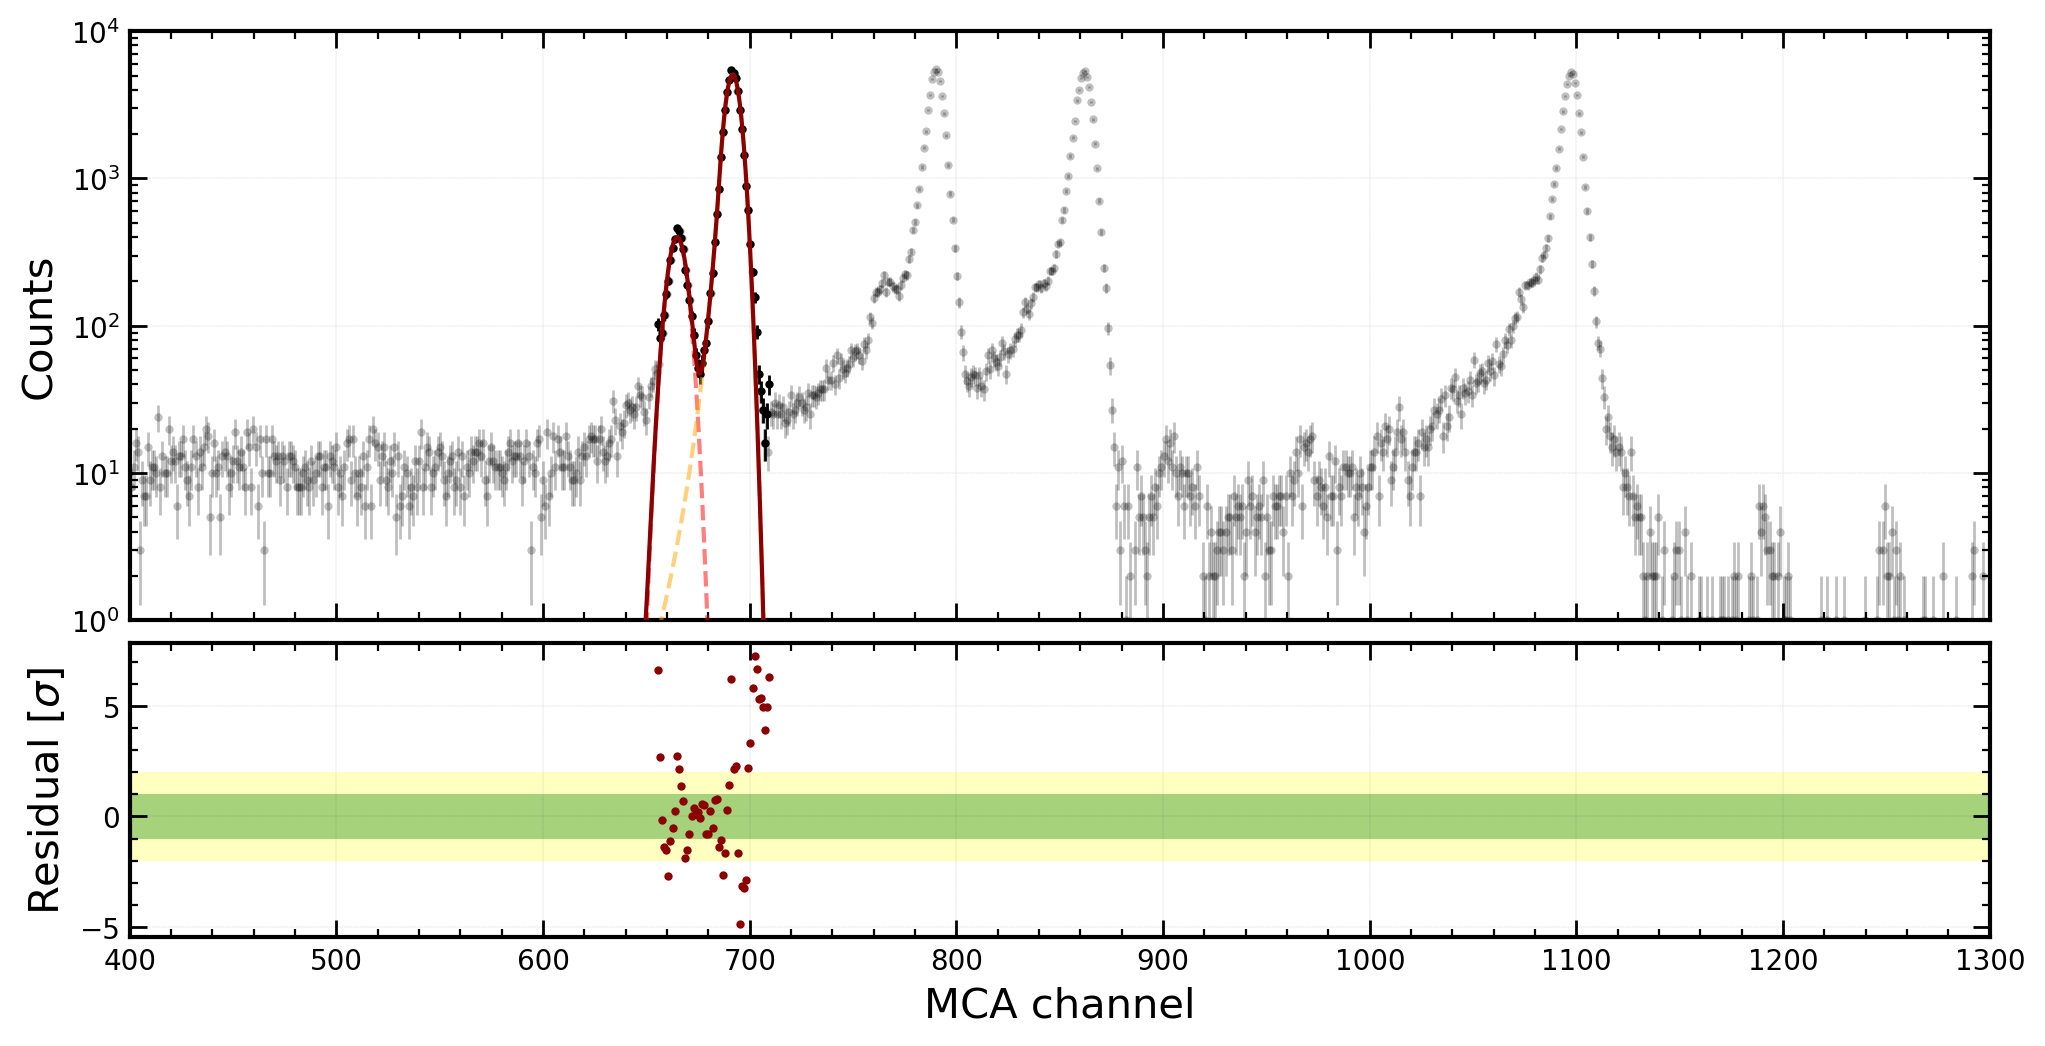

In [33]:
data, channels = monalpha.get_mca_histogram(MCA_range=[0, 1300])
_data, _channels = monalpha.get_mca_histogram(MCA_range=_MCA_range)
mask = (_data > _MCA_counts_limit)
_data = _data[mask]
_channels = _channels[mask]
_model = Model(_channels, *np.array(m.values))

x = np.arange(0, 1300, 0.1)
model = Model(x, *np.array(m.values))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), dpi=200, sharex=True, gridspec_kw={'height_ratios':[2,1], 'hspace': 0.05})

ax1.errorbar(channels, data, yerr=np.sqrt(data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=0.25)
ax1.errorbar(_channels, _data, yerr=np.sqrt(_data), lw=0, marker='o', color='black', ms=3, elinewidth=1, alpha=1)

l = ax1.plot(x, model.sum_terms(), ls='-', color='darkred', zorder=5)
ax1.plot(x, model.norm_1, ls='--', lw=1.5, color='red', alpha=0.5, zorder=3)
ax1.plot(x, model.crystalball_2, ls='--', lw=1.5, color='orange', alpha=0.5, zorder=3)

ax2.plot(_channels, (_data - _model.sum_terms()) / np.sqrt(_data), lw=0, marker='.', color=l[0].get_color())

ax2.axhspan(-2, 2, color='yellow', lw=0, alpha=0.25)
ax2.axhspan(-1, 1, color='green', lw=0, alpha=0.35)

ax1.set_yscale('log')
ax1.set_ylim(1e0, 1e4)
ax1.set_xlim(400, 1300)

ax1.grid()

# ax2.set_ylim(-5, 50)
ax2.grid()

ax2.set_xlabel('MCA channel')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Residual [$\sigma$]')
        
plt.tight_layout()
plt.show()